In [33]:
import requests
import pandas as pd
import geopandas as gpd
import os

In [2]:
api_key= 'Q0dGwScJ.EdgL1P5wLue7rrlFaIjQsr27LwbZyjzu'
url= 'https://api.patentsview.org/patents/query'
params= {
    'q': '{"_gte": {"patent_date":"2023-03-31"}}', #end date is march 31, 2024
    'f': '["patent_number", "patent_title", "assignee_city", "assignee_state", "assignee_country"]',
    'o': '{"per_page":"10000"}',
    'api_key': api_key
}

response = requests.get(url, params=params)
patent_data = response.json()


In [3]:
if 'patents' in patent_data:
    for patent in patent_data['patents']:
        assignees = patent.get('assignees', [])
        if assignees:
            assignee = assignees[0]
            latitude = assignee.get('assignee_latitude')
            longitude = assignee.get('assignee_longitude')
            print(f"Patent Number: {patent['patent_number']}, Title: {patent['patent_title']}, Latitude: {latitude}, Longitude: {longitude}")
else:
    print("No patents found in the response.")


Patent Number: 11617292, Title: Method for controlling the operation of an attachment, Latitude: None, Longitude: None
Patent Number: 11617293, Title: Hitch assembly for a work vehicle, Latitude: None, Longitude: None
Patent Number: 11617294, Title: Orientation control system for an agricultural implement, Latitude: None, Longitude: None
Patent Number: 11617295, Title: Dynamic supplemental downforce control system for planter row units, Latitude: None, Longitude: None
Patent Number: 11617296, Title: Agricultural machine equipped with a distribution tie-rod, Latitude: None, Longitude: None
Patent Number: 11617297, Title: Agricultural vehicle-trailer combination, Latitude: None, Longitude: None
Patent Number: 11617298, Title: Agricultural product delivery applicator with a pneumatic conveying system having a distributor assembly, Latitude: None, Longitude: None
Patent Number: 11617299, Title: System and method for regulating and dispensing seeds, fertilizer, and other items, Latitude: No

In [4]:
print(patent_data['patents'][0])

{'patent_number': '11617292', 'patent_title': 'Method for controlling the operation of an attachment', 'assignees': [{'assignee_city': 'Moline', 'assignee_state': 'IL', 'assignee_country': 'US', 'assignee_key_id': 110}]}


In [5]:
us_patents= []
i= 0
if 'patents' in patent_data:
    for patent in patent_data['patents']:
        assignees = patent.get('assignees', [])
        if assignees:
            assignee = assignees[0]
            city = assignee.get('assignee_city')
            state = assignee.get('assignee_state')
            country= assignee.get('assignee_country')
            i= i + 1
            #print(f"Patent Number {i}: {patent['patent_number']}, Title: {patent['patent_title']}, City: {city}, State: {state}, Country: {country}")

            if country== 'US':
                us_patents.append(patent)
                
else:
    print("No patents found in the response.")

print(len(us_patents))

4797


In [6]:
us_patents[0]

{'patent_number': '11617292',
 'patent_title': 'Method for controlling the operation of an attachment',
 'assignees': [{'assignee_city': 'Moline',
   'assignee_state': 'IL',
   'assignee_country': 'US',
   'assignee_key_id': 110}]}

In [7]:
df = pd.json_normalize(us_patents, 
                       record_path='assignees', 
                       meta=['patent_number', 'patent_title'], 
                       errors='ignore')

In [8]:
df

,assignee_city,assignee_state,assignee_country,assignee_key_id,patent_number,patent_title
0,Moline,IL,US,110,11617292,Method for controlling the operation of an att...
1,Moline,IL,US,110,11617293,Hitch assembly for a work vehicle
2,New Holland,PA,US,278,11617294,Orientation control system for an agricultural...
3,Tremont,IL,US,11209,11617295,Dynamic supplemental downforce control system ...
4,Moline,IL,US,110,11617297,Agricultural vehicle-trailer combination
...,...,...,...,...,...,...
4879,San Jose,CA,US,17827,11627372,Media channel identification with multi-match ...
4880,Washington,DC,US,329040,11627373,Systems and methods for providing survey data ...
4881,West Hollywood,CA,US,3462,11627375,Methods and systems for generating and providi...
4882,Suwanee,GA,US,5150,11627377,Set-top box ambiance and notification controller


In [9]:
# Group by city and state, count occurrences
df_counts = df.groupby(["assignee_city", "assignee_state"]).size().reset_index(name="Counts")

In [10]:
# Rename columns
df_counts.columns = ["City", "State", "Counts"]

In [11]:
df_counts_sorted= df_counts.sort_values(by="Counts", ascending=False)
df_counts_sorted.reset_index(drop= True, inplace= True)
df_counts_sorted

,City,State,Counts
0,San Jose,CA,159
1,Armonk,NY,156
2,San Francisco,CA,154
3,Santa Clara,CA,152
4,San Diego,CA,140
...,...,...,...
914,Charleston,SC,1
915,Chatham,NJ,1
916,Miamisburg,OH,1
917,Cheektowaga,NY,1


In [12]:
#df_counts_sorted.to_csv('All_cities_sorted_dataframe.csv')

In [13]:
coord_1= {'San Jose, CA': (37.3361663, -121.890591),
 'Armonk, NY': (41.1264847, -73.7139777),
 'San Francisco, CA': (37.7792588, -122.4193286),
 'Santa Clara, CA': (37.2333253, -121.6846349),
 'San Diego, CA': (32.7174202, -117.162772),
 'Mountain View, CA': (37.3893889, -122.0832101),
 'New York, NY': (40.7127281, -74.0060152),
 'Seattle, WA': (47.6038321, -122.330062),
 'Chicago, IL': (41.8755616, -87.6244212),
 'Houston, TX': (29.7589382, -95.3676974),
 'Dearborn, MI': (42.3222599, -83.1763145),
 'Cupertino, CA': (37.3228934, -122.0322895),
 'Redmond, WA': (47.6694141, -122.1238767),
 'Boise, ID': (43.6166163, -116.200886),
 'Charlotte, NC': (35.2272086, -80.8430827),
 'Atlanta, GA': (33.7489924, -84.3902644),
 'Cambridge, MA': (42.3656347, -71.1040018),
 'Austin, TX': (30.2711286, -97.7436995),
 'Menlo Park, CA': (37.4519671, -122.177992),
 'Palo Alto, CA': (37.4443293, -122.1598465),
 'Boston, MA': (42.3554334, -71.060511),
 'McLean, VA': (38.9342888, -77.1776327),
 'Wilmington, DE': (39.7459468, -75.546589),
 'Santa Monica, CA': (34.0194704, -118.491227),
 'Dallas, TX': (32.7762719, -96.7968559),
 'Washington, DC': (38.8950368, -77.0365427),
 'Sunnyvale, CA': (37.3688301, -122.036349),
 'Philadelphia, PA': (39.9527237, -75.1635262),
 'Spring, TX': (30.0795707, -95.4187924),
 'Minneapolis, MN': (44.9772995, -93.2654692),
 'Las Vegas, NV': (36.1672559, -115.148516),
 'Hopkinton, MA': (42.2288875, -71.5196439),
 'Detroit, MI': (42.3315509, -83.0466403),
 'Plano, TX': (33.0136764, -96.6925096),
 'Irvine, CA': (33.6856969, -117.825981),
 'Bellevue, WA': (47.6144219, -122.192337),
 'Denver, CO': (39.7392364, -104.984862),
 'Mansfield, MA': (42.0334326, -71.2189405),
 'Oakland, CA': (37.8044557, -122.271356),
 'Chesterfield, MO': (38.661953, -90.5643258),
 'Farmington, CT': (41.7198216, -72.8320435),
 'Arlington, VA': (38.8769326, -77.0893094),
 'Cincinnati, OH': (39.1014537, -84.5124602),
 'Pittsburgh, PA': (40.4416941, -79.9900861),
 'Schenectady, NY': (42.8142432, -73.9395687),
 'Beaverton, OR': (45.4871723, -122.80378),
 'Scottsdale, AZ': (33.4942189, -111.926018),
 'Redwood City, CA': (37.4863239, -122.232523),
 'Redwood Shores, CA': (37.5318804, -122.2480219),
 'San Mateo, CA': (37.496904, -122.3330573),
 'Auburn Hills, MI': (42.6875323, -83.2341028),
 'Waltham, MA': (42.3756401, -71.2358004),
 'Torrance, CA': (33.8371392, -118.3413606),
 'Indianapolis, IN': (39.7683331, -86.1583502),
 'Milwaukee, WI': (43.0386475, -87.9090751),
 'Benton Harbor, MI': (42.1167065, -86.4541894),
 'Carlsbad, CA': (33.1580933, -117.3505966),
 'Peoria, IL': (40.6938609, -89.5891008),
 'San Antonio, TX': (29.4246002, -98.4951405),
 'Suwanee, GA': (34.0514898, -84.0712997),
 'New Holland, PA': (40.1017643, -76.085227),
 'Durham, NC': (35.996653, -78.9018053),
 'Pleasanton, CA': (37.6624312, -121.8746789),
 'Los Angeles, CA': (34.0536909, -118.242766),
 'Plantation Gardens, FL': (26.1298084, -80.2375483),
 'Round Rock, TX': (30.5085915, -97.6788056),
 'Broomfield, CO': (39.9403995, -105.05208),
 'Bozeman, MT': (45.6794293, -111.044047),
 'Phoenix, AZ': (33.4484367, -112.074141),
 'Raleigh, NC': (35.7803977, -78.6390989),
 'Foster City, CA': (37.5600336, -122.2688522),
 'Madison, WI': (43.074761, -89.3837613),
 'Los Altos, CA': (37.3790629, -122.116578),
 'Addison, TX': (32.960477850000004, -96.8300673063398),
 'Hickory, NC': (35.7333312, -81.3442915),
 'Okabena, MN': (43.739404, -95.3158321),
 'Fort Lauderdale, FL': (26.1223084, -80.1433786),
 'Moline, IL': (41.5058344, -90.5136642),
 'Brookfield, WI': (43.0578479, -88.1261984),
 'Purchase, NY': (41.0409305, -73.7145746),
 'Melbourne, FL': (28.0785034, -80.6077908),
 'Boca Raton, FL': (26.3586885, -80.0830984),
 'Franklin Lakes, NJ': (41.0167639, -74.2057012),
 'Chandler, AZ': (33.3062031, -111.841185),
 'Salt Lake City, UT': (40.7596198, -111.886797),
 'Bentonville, AR': (36.3728538, -94.2088172),
 'Pasadena, CA': (34.1476507, -118.144155),
 'Sugar Land, TX': (29.6196787, -95.6349463),
 'Fremont, CA': (37.5482697, -121.988571),
 'Columbus, OH': (39.9622601, -83.0007065),
 'Reston, VA': (38.953055899999995, -77.35021396591173),
 'Corning, NY': (42.1435257, -77.0543408),
 'Milpitas, CA': (37.4332273, -121.8989248),
 'Providence, RI': (41.8239891, -71.4128343),
 'Santa Rosa, CA': (38.4404925, -122.7141049),
 'Stamford, CT': (41.0534302, -73.5387341),
 'Maple Grove, MN': (45.0984983, -93.4419222),
 'Columbus, IN': (39.2014405, -85.9213796)}

In [14]:
coord_2= {'Rochester, NY': (43.157285, -77.615214),
 'Cleveland, OH': (41.4996574, -81.6936772),
 'Kalamazoo, MI': (42.291707, -85.5872286),
 'Monet, FL': (26.8381164, -80.0942089),
 'Wauwatosa, WI': (43.0494122, -88.0079271),
 'Burlington, MA': (42.5048167, -71.1956111),
 'Winston-Salem, NC': (36.0998131, -80.2440518),
 'South Burlington, VT': (44.4671635, -73.1715669),
 'Greensboro, NC': (36.0726355, -79.7919754),
 'Alpharetta, GA': (34.0709576, -84.2747329),
 'Ann Arbor, MI': (42.2813722, -83.7484616),
 'Bedford, MA': (42.4917301, -71.2817947),
 'Newport Beach, CA': (33.6170092, -117.9294401),
 'South San Francisco, CA': (37.6535403, -122.4168664),
 'Englewood, CO': (39.6482059, -104.9879641),
 'Colorado Springs, CO': (38.8339578, -104.825348),
 'Grand Rapids, MI': (42.9632425, -85.6678639),
 'Tinley Park, IL': (41.5733669, -87.7844944),
 'Northbrook, IL': (42.128704, -87.8265089),
 'McNeil, CA': (43.67934495, -79.28214780809049),
 'Brooklyn, NY': (40.6526006, -73.9497211),
 'Monrovia, CA': (34.1483499, -118.0014517),
 'Rockville, MD': (39.0817985, -77.1516844),
 'Richmond, VA': (37.5385087, -77.43428),
 'Raynham, MA': (41.9487118, -71.0731008),
 'Warsaw, IN': (41.2381017, -85.8530544),
 'Framingham, MA': (42.2773177, -71.4165905),
 'Memphis, TN': (35.1460249, -90.0517638),
 'Cedar Rapids, IA': (41.9758872, -91.6704053),
 'Malvern, PA': (40.036202, -75.5138959),
 'Norwalk, CT': (41.1175966, -73.4078968),
 'Livermore, CA': (37.6820583, -121.768053),
 'Campbell, CA': (37.2870626, -121.944881),
 'Overland Park, KS': (38.9742502, -94.6851702),
 'Bloomington, IL': (40.4797828, -88.9939147),
 'Burbank, CA': (34.1812089, -118.307201),
 'Shelton, CT': (41.370196, -73.150955),
 'Huntsville, AL': (34.729847, -86.5859011),
 'Eden Prairie, MN': (44.8546856, -93.470786),
 'Southfield, MI': (42.4733689, -83.2218731),
 'West Lafayette, IN': (40.4258686, -86.9080655),
 'Glenview, IL': (42.0700662, -87.8114044),
 'Tucson, AZ': (32.2228765, -110.974847),
 'Germantown, MD': (39.17130815, -77.26557848822242),
 'Charlottesville, VA': (38.029306, -78.4766781),
 'Middleton, WI': (43.0962919, -89.5119565),
 'Tampa, FL': (27.9477595, -82.458444),
 'Chimney Lakes, FL': (30.1963894, -81.8004201),
 'Troy, MI': (42.7284117, -73.6917878),
 'Jacksonville, FL': (30.3321838, -81.655651),
 'Tulsa, OK': (36.1563122, -95.9927516),
 'Twin Lakes, CA': (34.9871933, -118.5145308),
 'Fort Collins, CO': (40.5871782, -105.0770113),
 'Mayfield Heights, OH': (41.5192189, -81.457896),
 'Louisville, CO': (39.977763, -105.1319296),
 'West Point, IA': (40.7173713, -91.4530771),
 'College Station, TX': (30.6183939, -96.3455991),
 'Manchester, NH': (42.9956397, -71.4547891),
 'Zeeland, MI': (42.8123375, -86.0165267),
 'Midland School, CA': (34.7315638, -120.0875652),
 'Midland, MI': (31.83688, -102.0103767),
 'Goleta, CA': (34.4358295, -119.8276389),
 'Richland, WA': (46.2804298, -119.275205),
 'Orlando, FL': (28.5421109, -81.3790304),
 'Brooks Road, CA': (43.7913876, -79.20671357095105),
 'Brooklyn Park, MN': (45.1004807, -93.3443585),
 'Portland, OR': (45.5202471, -122.674194),
 'Princeton, NJ': (40.3496953, -74.6597376),
 'Boulder, CO': (40.0149856, -105.270545),
 'Kirkland, WA': (47.6765382, -122.2070775),
 'Reno, NV': (39.5261206, -119.8126581),
 'Lakewood, CO': (39.7085736, -105.0846694),
 'Columbia, MD': (39.1938429, -76.86460919353361),
 'Hayward, CA': (37.6688205, -122.080796),
 'Baltimore, MD': (39.2908816, -76.610759),
 'Saratoga, CA': (37.2638324, -122.0230146),
 'Bethesda, MD': (38.9846816, -77.0942447),
 'Billerica, MA': (42.5584264, -71.268947),
 'Lisle, IL': (41.801159, -88.0747687),
 'Evanston, IL': (42.0470043, -87.6846053),
 'Hanover, MD': (39.1928853, -76.7241371),
 'Ewing, NJ': (40.2688105, -74.8006895),
 'Fairhaven, MA': (41.6376043, -70.9036487),
 'Hanover, NH': (43.7023545, -72.2892164),
 'Gaithersburg, MD': (39.1399187, -77.1929215),
 'Holland, MI': (42.7876022, -86.1090828),
 'Florham Park, NJ': (40.7881643, -74.3891647),
 'Knoxville, TN': (35.9603948, -83.9210261),
 'Irving, TX': (32.8295183, -96.9442177),
 'Franklin, TN': (35.925206, -86.8689419),
 'Fort Worth, TX': (32.753177, -97.3327459),
 'Manassas, VA': (38.7509488, -77.4752667),
 'Malibu, CA': (34.035591, -118.689423),
 'Oak Ridge, TN': (36.0103562, -84.2696449),
 'Palatine, IL': (42.1105779, -88.0336888),
 'Parsippany, NJ': (40.8578772, -74.4259866),
 'Peabody, MA': (42.5278731, -70.9286609),
 'Bothell, WA': (47.7623204, -122.2054035),
 'Provo, UT': (40.2337289, -111.6587085),
 'Rockaway, NJ': (40.9012101, -74.5143232)}

In [15]:
coord_3= {'Saginaw, MI': (43.3326882, -84.0468403),
 'Berkeley, CA': (37.8708393, -122.272863),
 'San Ramon, CA': (37.7648021, -121.9544387),
 'Baton Rouge, LA': (30.4494155, -91.1869659),
 'Sidney, OH': (40.284241, -84.1555267),
 'South Jordan, UT': (40.5584882, -111.9367107),
 'Vienna, VA': (38.9013729, -77.2651762),
 'Virginia Beach, VA': (36.8496579, -75.9760751),
 'Albuquerque, NM': (35.0841034, -106.650985),
 'Wilmington, MA': (42.5464828, -71.1736669),
 'Alameda, CA': (37.6090291, -121.899142),
 'Burnsville, MN': (44.7670567, -93.2773887),
 'Emeryville, CA': (37.8314089, -122.2865266),
 'Needham, MA': (42.2802645, -71.2360624),
 'Nonatum Mills, DE': (39.6946641, -75.7393074),
 'Miami, FL': (25.7741728, -80.19362),
 'Medina, MN': (45.0151361, -93.574375),
 'Maumee, OH': (41.5628294, -83.6538244),
 'New Haven, CT': (41.3082138, -72.9250518),
 'Northfield, IL': (42.09975, -87.7808967),
 'The Woodlands, TX': (30.1734194, -95.504686),
 'Thousand Oaks, CA': (34.1705609, -118.8375937),
 'Tysons, VA': (38.9191272, -77.22296360086021),
 'Urbana, IL': (40.1117174, -88.207301),
 'Mettawa, IL': (42.2333571, -87.9259058),
 'Watertown, MA': (42.3652518, -71.1843236),
 'Watertown, SD': (44.899211, -97.115289),
 'State College, PA': (40.7944504, -77.8616386),
 'Flagstaff, AZ': (35.1987522, -111.651822),
 'Louisville, KY': (38.2542376, -85.759407),
 'Fargo, ND': (46.877229, -96.789821),
 'Marshall, TX': (32.5447756, -94.3661004),
 'Worcester, MA': (42.2625621, -71.8018877),
 'York, PA': (39.962493, -76.7276989),
 'Evansdale, FL': (28.7483282, -81.3192335),
 'Tempe, AZ': (33.4255117, -111.940016),
 'Gainesville, FL': (29.6519684, -82.3249846),
 'Frisco, TX': (33.1505998, -96.8238183),
 'Orem, UT': (40.2981599, -111.6944313),
 'Kansas City, MO': (39.100105, -94.5781416),
 'Newark, CA': (37.5296593, -122.0402399),
 'Perry, OK': (36.2907352, -97.288396),
 'Plymouth, MI': (42.7369124, -96.2213607),
 'Katy, TX': (29.7857853, -95.8243956),
 'New Providence, NJ': (40.6984348, -74.4015405),
 'Rochester, NH': (43.3041111, -70.9759638),
 'Marlborough, MA': (42.3459271, -71.5522874),
 'New Orleans, LA': (29.9759983, -90.0782127),
 'San Fernando, CA': (34.28497, -118.437652),
 'Minnetonka, MN': (44.9405086, -93.4638936),
 'Lawrence, MA': (42.7070354, -71.1631137),
 'Miami Beach, FL': (25.7929198, -80.1353006),
 'Sioux Falls, SD': (43.5476008, -96.7293629),
 'Spokane, WA': (47.6571934, -117.42351),
 'Rochester Hills, MI': (42.6583661, -83.1499322),
 'معلمی نژاد, CA': (35.7101661, 51.4857646),
 'Beverly Hills, CA': (34.0696501, -118.3963062),
 'Alexandria, VA': (38.8051095, -77.0470229),
 'Cypress, CA': (33.8248235, -118.0399368),
 'Des Moines, IA': (41.5868654, -93.6249494),
 'Audubon, PA': (40.131174400000006, -75.42279892329418),
 'Allentown, PA': (40.6022059, -75.4712794),
 "Coeur d'Alene, ID": (47.6742994, -116.7811531),
 'Brookhaven, GA': (33.8584368, -84.340203),
 'East Syracuse, NY': (43.0653446, -76.0785332),
 'Davidson, NC': (35.7902384, -80.2115053),
 'Danbury, CT': (41.394817, -73.4540111),
 'Culver City, CA': (34.0211224, -118.396466),
 'Coopersburg, PA': (40.51146, -75.3903376),
 'Duluth, GA': (34.0028569, -84.1441046),
 'Kohler, WI': (43.7391616, -87.7817541),
 'Rockford, IL': (42.2713945, -89.093966),
 'Klamath Falls, OR': (42.224867, -121.78167),
 'New Richmond, IN': (40.193474, -86.97975343136028),
 'Lewisville, TX': (33.046233, -96.994174),
 'Lewes, DE': (38.7733961, -75.1379574),
 'Lehi, UT': (40.3881114, -111.8486019),
 'New Albany, IN': (38.2856247, -85.8241312),
 'Leesburg, VA': (39.1154506, -77.5645607),
 'Tallahassee, FL': (30.4380832, -84.2809332),
 'Lakeland, NY': (43.0903976, -76.2403355),
 'Lebanon, NH': (43.643032, -72.251587),
 'Carpinteria, CA': (34.3988838, -119.5184564),
 'Neenah, WI': (44.1858193, -88.462609),
 'Tarrytown, NY': (41.0762077, -73.8587461),
 'Lake Zurich, IL': (42.1969689, -88.0934108),
 'Lubbock, TX': (33.5855677, -101.8470215),
 'Birmingham, AL': (33.5206824, -86.8024326),
 'Toledo, OH': (41.6529143, -83.5378173),
 'Hudson, MA': (42.3913503, -71.5676895),
 'Bloomfield, CT': (41.826488, -72.7300945),
 'Richardson, TX': (32.9481789, -96.7297206),
 'Huntersville, NC': (35.4108278, -80.8429304),
 'Deerfield, IL': (42.1711365, -87.8445119),
 'Hyannis, MA': (41.6534847, -70.2823732),
 'Idlewild, MI': (39.1090624, -120.160119),
 'North Bloomfield, OH': (41.4628274, -80.8683281),
 'Annapolis, MD': (38.9786401, -76.492786),
 'Dayton, OH': (39.7589478, -84.1916069),
 'Blacksburg, VA': (37.2296566, -80.4136767),
 'Ithaca, NY': (42.437417499999995, -76.54837235139263),
 'Jersey City, NJ': (40.7215682, -74.047455),
 'Newtown Square, PA': (39.9868117, -75.4007633),
 'Rochester, MN': (44.0234387, -92.4630182),
 'Dale, IN': (38.1689416, -86.9899966),
 'Apex, NC': (35.7325352, -78.8505516),
 'Natick, MA': (42.2836393, -71.346996),
 'Kenner, LA': (29.9942265, -90.2417806),
 'Camp Dennison, OH': (39.1981151, -84.2888265),
 'Cookeville, TN': (36.1623886, -85.4997057),
 'Nashua, NH': (42.7656251, -71.4677032),
 'Cerritos, CA': (33.8644291, -118.0539323),
 'Auburn, AL': (32.6098566, -85.4807825),
 'Marshalltown, IA': (42.048881, -92.9122672),
 'Avon, OH': (41.4516512, -82.0350598),
 'Santa Ana, CA': (33.7494951, -117.873221),
 'Somerville, MA': (42.3875968, -71.0994968),
 'Cockeysville, MD': (39.483758800000004, -76.6235105199021),
 'Maynard, MA': (42.4321064, -71.4539683),
 'Cedar Park, TX': (30.5217116, -97.827833),
 'Milwaukie, OR': (45.4440051, -122.6412523),
 'Santa Fe Springs, CA': (33.9480787, -118.0691499),
 'Sparta, WI': (43.9440667, -90.8108268),
 'Melville, NY': (40.7934322, -73.4151214),
 'Simi Valley, CA': (34.2677404, -118.7538071),
 'Clearwater, FL': (27.9658533, -82.8001026),
 'Menands, NY': (42.6920233, -73.7245639),
 'Barneveld, WI': (43.0153376, -89.8958792),
 'Shelby Charter Township, MI': (42.6696409, -83.0338011),
 'Meridian Avenue, CT': (47.0582979, -122.293795),
 'Chapel Hill, NC': (35.9131542, -79.05578),
 'Baytown, TX': (29.7355047, -94.9774274),
 'Sandy, UT': (40.5710454, -111.8953815),
 'College Hill, PA': (40.7032968, -75.2073622),
 'Lincolnshire, IL': (42.1900249, -87.9084039),
 'Stratford, CT': (41.1845415, -73.1331651),
 'North Little Rock, AR': (34.769536, -92.2670941),
 'Little Falls, NJ': (40.8689882, -74.2082011),
 'Littleton, CO': (39.613321, -105.016649),
 'Saint Paul, MN': (44.9497487, -93.0931028),
 'Livonia, MI': (42.36837, -83.3527097),
 'Morrisville, NC': (35.824341, -78.8300321),
 'Morristown, NJ': (40.7970382, -74.4809868),
 'Salina, KS': (38.8402805, -97.6114237),
 'Los Altos Hills, CA': (37.3796627, -122.137463),
 'Los Gatos, CA': (37.226611, -121.9746797),
 'Cary, NC': (35.7882893, -78.7812081),
 'Concord, MA': (42.4605189, -71.3488963),
 'San Clemente, CA': (33.4270275, -117.6124179),
 'Bend, OR': (44.0581728, -121.3153096),
 'Stanford, CA': (37.426540700000004, -122.17030545534064),
 'Columbia, SC': (34.0003117, -81.0331309),
 'Malta, NY': (42.9711708, -73.792926),
 'St. Petersburg, FL': (27.7700475, -82.6359078),
 'Springfield, VA': (38.7767435, -77.1807019310668),
 'Springfield, IL': (39.7990175, -89.6439575),
 'Bloomfield Hills, MI': (42.583645, -83.2454883),
 'Niskayuna, NY': (42.8154056, -73.8928774),
 'Chelmsford, MA': (42.5968617, -71.3517602),
 'Orland Park, IL': (41.630663, -87.8536288),
 'Fort Lupton, CO': (40.0847055, -104.813027),
 'Osprey, FL': (27.190389500000002, -82.47923200437916),
 'Oshkosh, WI': (44.0206919, -88.5408574),
 'Orrville, OH': (40.8436664, -81.7640212),
 'Glenwillow, OH': (41.361721, -81.46956),
 'Albany, NY': (42.6511674, -73.754968),
 'Aliso Viejo, CA': (33.5761376, -117.7258122),
 'Oxford, CT': (41.4351795, -73.1172769),
 'Wilmington, NC': (34.2257282, -77.9447107),
 'Patterson, OH': (40.7806102, -83.5257602),
 'Pullman, WA': (46.7304268, -117.173895),
 'Omaha, NE': (41.2587459, -95.9383758),
 'Akron, OH': (41.083064, -81.518485),
 'Woburn, MA': (42.4792618, -71.1522766),
 'Wickford, RI': (41.5739753, -71.4614464),
 'Oxford, MA': (42.1170157, -71.8644387),
 'Ogden, UT': (41.2230048, -111.9738429),
 'Westport, CT': (41.1414855, -73.3578955),
 'Westminster, MD': (39.5751717, -76.9959168),
 'Franklin Park, IL': (41.9353084, -87.865618),
 'Plymouth, MN': (45.0065149, -93.46651),
 'Westlake, OH': (41.4553232, -81.9179174),
 'Fresno, CA': (36.7394421, -119.78483),
 'Fullerton, CA': (33.8708215, -117.929416),
 'Foxborough, MA': (42.0653768, -71.2478308),
 'Wichita, KS': (37.6922361, -97.3375448),
 'Gainesville, TX': (33.6258504, -97.1332963),
 'Westborough, MA': (42.2694308, -71.6129907),
 'East Lansing, MI': (42.7320307, -84.4721678),
 'Gastonia, NC': (35.2622654, -81.1838186),
 'Potomac, MD': (39.017936, -77.2094542),
 'Buffalo Grove, IL': (42.1544205, -87.9589621),
 'Woodbury, NY': (40.8256545, -73.4676225),
 'Waterbury, CT': (41.5538091, -73.0438362),
 'Calabasas, CA': (34.1446643, -118.644097),
 'Petaluma, CA': (38.2325829, -122.636465),
 'Hartford, CT': (41.764582, -72.6908547),
 'Hartsville, SC': (34.3740431, -80.0734005),
 'Hauppauge, NY': (40.8256537, -73.2026138),
 'Yardley, PA': (40.245664, -74.8459972),
 'Village of La Jolla, CA': (32.8443342, -117.2709217),
 'American Fork, UT': (40.3768064, -111.7959146),
 'Elkhart, IN': (41.6012796, -85.8590603),
 'Fairfax, VA': (38.8156356, -77.2836849),
 'Norwood, MA': (42.194543, -71.1994976),
 'Vancouver, WA': (45.6306954, -122.6744557),
 'Elyria, OH': (41.3673191, -82.1073583),
 'Northville, MI': (42.4310816, -83.4832339),
 'Valencia, CA': (10.170026, -68.0003987),
 'Ames, IA': (42.0267567, -93.6170448),
 'Raritan, NJ': (40.567181, -74.634683),
 'Branford, CT': (41.2795414, -72.8150989),
 'Waco, TX': (31.5491899, -97.1474628),
 'Wakefield, MA': (42.506484, -71.0728306),
 'Ocala, FL': (29.1871986, -82.1400923),
 'Hamilton, OH': (39.2085354, -84.5501874),
 'Elder Mountain, TN': (35.1056293, -85.3957943),
 'Falls Church, VA': (38.882334, -77.1710914),
 'Walnut Creek, CA': (37.9020731, -122.0618702)}

In [16]:
# Combine dictionaries into a single dictionary
combined_dict = {**coord_1, **coord_2, **coord_3}

# Create a DataFrame
com_df = pd.DataFrame.from_dict(combined_dict, orient='index', columns=['Latitude', 'Longitude'])

# Reset the index to have a column for city names
com_df.reset_index(inplace=True)
com_df.rename(columns={'index': 'City'}, inplace=True)

# Display the DataFrame
com_df

,City,Latitude,Longitude
0,"San Jose, CA",37.336166,-121.890591
1,"Armonk, NY",41.126485,-73.713978
2,"San Francisco, CA",37.779259,-122.419329
3,"Santa Clara, CA",37.233325,-121.684635
4,"San Diego, CA",32.717420,-117.162772
...,...,...,...
412,"Ocala, FL",29.187199,-82.140092
413,"Hamilton, OH",39.208535,-84.550187
414,"Elder Mountain, TN",35.105629,-85.395794
415,"Falls Church, VA",38.882334,-77.171091


In [23]:
com_df.columns

Index(['City', 'Latitude', 'Longitude'], dtype='object')

In [25]:
new_df= pd.concat([df_counts_sorted, com_df['Latitude'], com_df['Longitude']], axis= 1)

In [26]:
new_df

,City,State,Counts,Latitude,Longitude
0,San Jose,CA,159,37.336166,-121.890591
1,Armonk,NY,156,41.126485,-73.713978
2,San Francisco,CA,154,37.779259,-122.419329
3,Santa Clara,CA,152,37.233325,-121.684635
4,San Diego,CA,140,32.717420,-117.162772
...,...,...,...,...,...
914,Charleston,SC,1,NaN,NaN
915,Chatham,NJ,1,NaN,NaN
916,Miamisburg,OH,1,NaN,NaN
917,Cheektowaga,NY,1,NaN,NaN


In [29]:
lat_counts = new_df['Latitude'].isna().sum()
lat_counts

502

In [30]:
com_counts= com_df['Latitude'].isna().sum()
com_counts

0

In [31]:
clean_df= new_df[new_df['Latitude'].notna()]
clean_df

,City,State,Counts,Latitude,Longitude
0,San Jose,CA,159,37.336166,-121.890591
1,Armonk,NY,156,41.126485,-73.713978
2,San Francisco,CA,154,37.779259,-122.419329
3,Santa Clara,CA,152,37.233325,-121.684635
4,San Diego,CA,140,32.717420,-117.162772
...,...,...,...,...,...
412,Wakefield,MA,2,29.187199,-82.140092
413,Ocala,FL,2,39.208535,-84.550187
414,Hamilton,OH,2,35.105629,-85.395794
415,Elder Mountain,TN,2,38.882334,-77.171091


In [49]:
filtered_df= clean_df[clean_df['Longitude'] < 0]
filtered_df

,City,State,Counts,Latitude,Longitude
0,San Jose,CA,159,37.336166,-121.890591
1,Armonk,NY,156,41.126485,-73.713978
2,San Francisco,CA,154,37.779259,-122.419329
3,Santa Clara,CA,152,37.233325,-121.684635
4,San Diego,CA,140,32.717420,-117.162772
...,...,...,...,...,...
412,Wakefield,MA,2,29.187199,-82.140092
413,Ocala,FL,2,39.208535,-84.550187
414,Hamilton,OH,2,35.105629,-85.395794
415,Elder Mountain,TN,2,38.882334,-77.171091


In [50]:
filtered_df.columns

Index(['City', 'State', 'Counts', 'Latitude', 'Longitude'], dtype='object')

In [17]:
!pip install matplotlib geopandas contextily

## Plotting the Patent Data

In [58]:
!pip install plotly.express

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 30.0 MB/s eta 0:00:0000:0100:01


In [59]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import os
import plotly.express as px

In [60]:
df= filtered_df

In [61]:
# Specify the full path to the shapefile

path= os.getcwd()
shapefile_path = path + '/Shape File/ne_110m_admin_1_states_provinces.shp'

# Load the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame
print(gdf.head())

           featurecla  scalerank adm1_code  diss_me iso_3166_2  \
0  Admin-1 scale rank          2  USA-3514     3514      US-MN   
1  Admin-1 scale rank          2  USA-3515     3515      US-MT   
2  Admin-1 scale rank          2  USA-3516     3516      US-ND   
3  Admin-1 scale rank          2  USA-3517     3517      US-HI   
4  Admin-1 scale rank          2  USA-3518     3518      US-ID   

                                   wikipedia iso_a2  adm0_sr          name  \
0     http://en.wikipedia.org/wiki/Minnesota     US        1     Minnesota   
1       http://en.wikipedia.org/wiki/Montana     US        1       Montana   
2  http://en.wikipedia.org/wiki/North_Dakota     US        1  North Dakota   
3        http://en.wikipedia.org/wiki/Hawaii     US        8        Hawaii   
4         http://en.wikipedia.org/wiki/Idaho     US        1         Idaho   

    name_alt  ... FCLASS_ID FCLASS_PL FCLASS_GR FCLASS_IT FCLASS_NL FCLASS_SE  \
0   MN|Minn.  ...      None      None      None      

<Axes: >

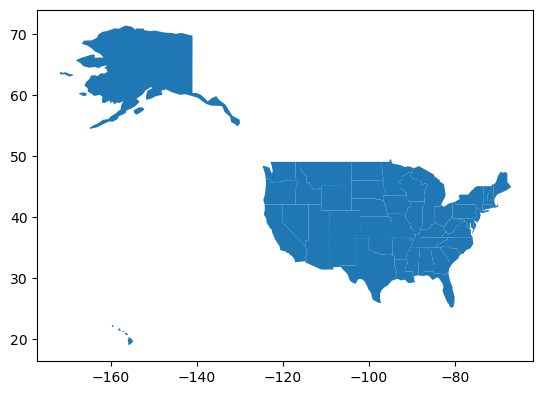

In [62]:
gdf.plot()

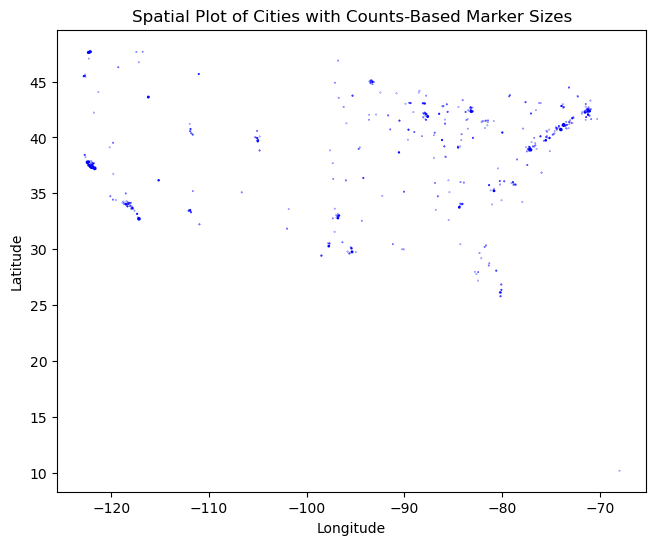

In [64]:
# Create a geometry column using Longitude and Latitude
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Convert DataFrame to GeoDataFrame
gdf_2 = gpd.GeoDataFrame(df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (common for GPS coordinates)
gdf_2.set_crs(epsg=4326, inplace=True)

# Plot, using the 'Counts' column for marker size
gdf_2.plot(marker='o', color='blue', markersize=gdf_2['Counts'] / 53, figsize=(10, 6))  # Adjust divisor as needed for scaling
plt.title("Spatial Plot of Cities with Counts-Based Marker Sizes")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [67]:
fig = px.scatter_geo(
    df,
    lat='Latitude',
    lon='Longitude',
    text='City',  # Optional: label points with city names
    size='Counts',  # Size of markers based on 'Counts' column
    size_max=160,  # Adjust max size of markers
    color='Counts',  # Color scale based on counts
    projection='natural earth'  # Choose projection type
)

# Update layout for better visualization
fig.update_layout(
    title="Spatial Plot of Cities with Counts-Based Marker Sizes",
    geo=dict(
        showland=True, landcolor="lightgrey"
    )
)

fig.show()

# University Endowment Data

In [ ]:
doe_key= 'D8TM7Li5hhre883IJ0Y6apw1qiWHmjLvbWo8bdmV'

In [ ]:
url= 'https://api.data.gov/ed/collegescorecard/v1/schools'

params= {
    'api_key': doe_key,
    'fields': {'ENDOWBEGIN', 'ENDOWEND'}
}

#https://api.data.gov/ed/collegescorecard/v1/schools?api_key=YOUR_API_KEY&fields=ENDOWBEGIN,ENDOWEND,

doe_response = requests.get(url, params=params)
doe_data = doe_response.json()

In [ ]:
doe_data